In [148]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [150]:
df= pd.read_csv("C:\\Users\\salma\\Downloads\\1) iris(1).csv")

In [152]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [154]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [156]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [158]:
df.duplicated().sum()

3

In [160]:
df=df.drop_duplicates()

In [162]:
df.duplicated().sum()

0

divide data to feature and label

In [165]:
x=df.drop('species',axis = 1)#features 
y=df['species']#label

split data to train ,test

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [170]:
rn_model=RandomForestClassifier()

In [172]:
rn_model.fit(x_train, y_train)

RandomForestClassifier()

In [173]:
y_pred = rn_model.predict(x_test)

In [176]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [196]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2',None]
}

In [198]:
grid_search = GridSearchCV(estimator=rn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [200]:
grid_search.fit(x_train, y_train)

C:\Users\salma\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [202]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [204]:
def apply_model(model):
    model.fit(x_train,y_train)
    test_pred=model.predict(x_test)
    trian_pred = model.predict(x_train)
    print('train predection')
    print(classification_report(y_train,trian_pred))
    print ('test predection')
    print(classification_report(y_test,test_pred))
    sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt='d')

train predection
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        37
  versicolor       1.00      0.95      0.97        40
   virginica       0.95      1.00      0.98        40

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117

test predection
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



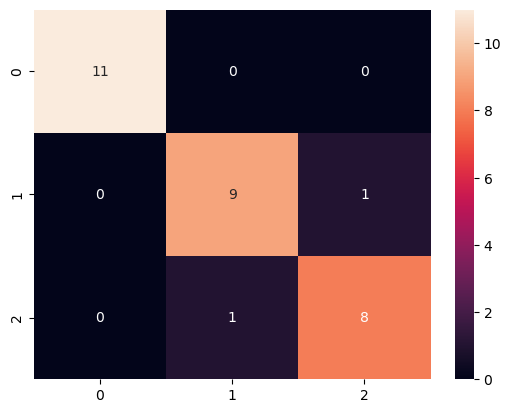

In [210]:
apply_model(RandomForestClassifier(max_depth= 20, max_features= 'log2', min_samples_leaf=2, min_samples_split= 10, n_estimators= 100))

In [212]:
importances = rn_model.feature_importances_

In [230]:
feature_names = x.columns

In [228]:
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [232]:
importance_df = importance_df.sort_values(by='importance', ascending=False)

In [234]:
print("Feature Importances:")
print(importance_df)

Feature Importances:
        feature  importance
2  petal_length    0.480351
3   petal_width    0.428375
0  sepal_length    0.076296
1   sepal_width    0.014978


<Figure size 1500x800 with 0 Axes>

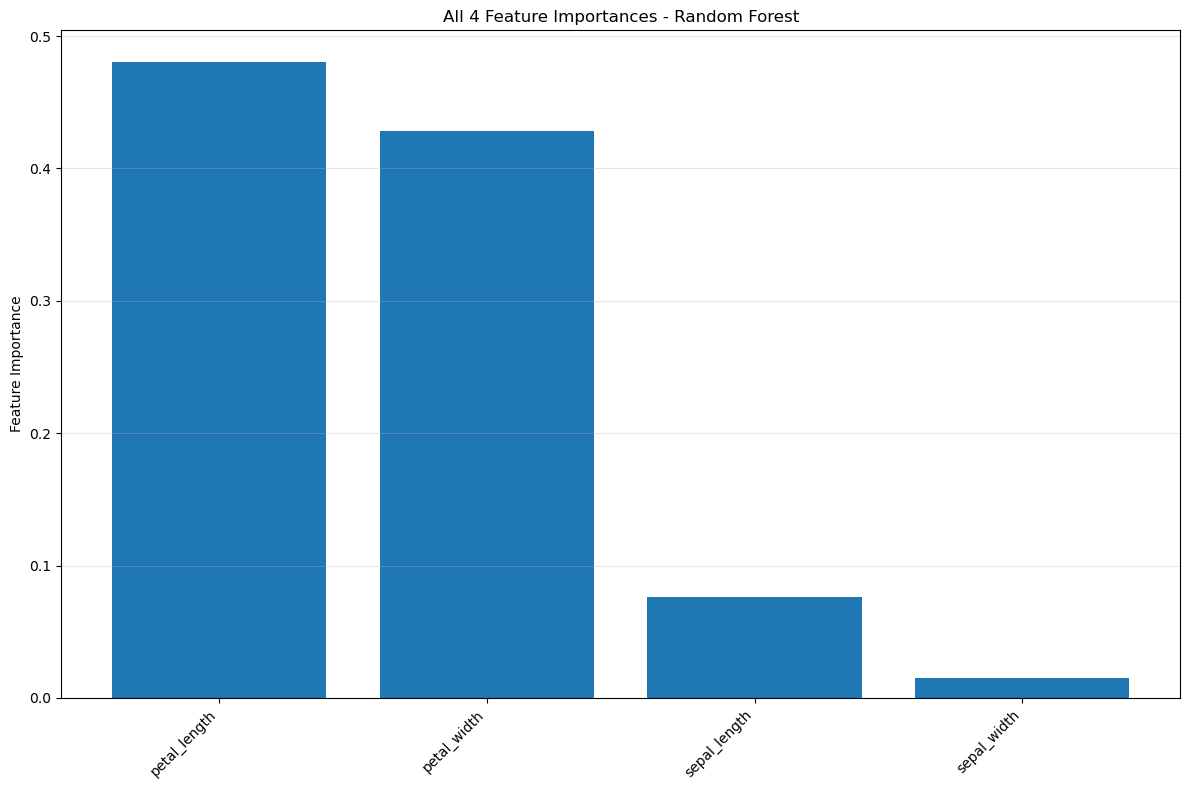


Feature Importance Statistics:
Total features: 4
Mean importance: 0.2500
Std importance: 0.2063
Max importance: 0.4804 (petal_length)
Min importance: 0.0150 (sepal_width)

Importance Distribution by Quartiles:
25th percentile: 0.0610
50th percentile (median): 0.2523
75th percentile: 0.4414

Feature Categories:
High importance features: 1
Medium importance features: 1
Low importance features: 2


In [250]:
# Plot ALL feature importances
plt.figure(figsize=(15, max(8, len(feature_names) * 0.4)))  # Dynamic height based on number of features

# Alternative: Vertical bar plot (better for many features)
plt.figure(figsize=(max(12, len(feature_names) * 0.6), 8))
plt.bar(range(len(importance_df)), importance_df['importance'])
plt.xticks(range(len(importance_df)), importance_df['feature'], rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.title(f'All {len(feature_names)} Feature Importances - Random Forest')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



# Color code based on importance levels
colors = []
threshold_high = importance_df['importance'].quantile(0.75)
threshold_medium = importance_df['importance'].quantile(0.50)

for importance in importance_df['importance']:
    if importance >= threshold_high:
        colors.append('red')      # High importance
    elif importance >= threshold_medium:
        colors.append('orange')   # Medium importance
    else:
        colors.append('lightblue') # Low importance


# Feature importance summary statistics
print(f"\nFeature Importance Statistics:")
print(f"Total features: {len(feature_names)}")
print(f"Mean importance: {feature_importance.mean():.4f}")
print(f"Std importance: {feature_importance.std():.4f}")
print(f"Max importance: {feature_importance.max():.4f} ({importance_df.iloc[0]['feature']})")
print(f"Min importance: {feature_importance.min():.4f} ({importance_df.iloc[-1]['feature']})")

# Show distribution by quartiles
print(f"\nImportance Distribution by Quartiles:")
quartiles = importance_df['importance'].quantile([0.25, 0.5, 0.75])
print(f"25th percentile: {quartiles[0.25]:.4f}")
print(f"50th percentile (median): {quartiles[0.5]:.4f}")
print(f"75th percentile: {quartiles[0.75]:.4f}")

# Count features in each importance category
high_importance_count = len(importance_df[importance_df['importance'] >= threshold_high])
medium_importance_count = len(importance_df[
    (importance_df['importance'] >= threshold_medium) & 
    (importance_df['importance'] < threshold_high)
])
low_importance_count = len(importance_df[importance_df['importance'] < threshold_medium])

print(f"\nFeature Categories:")
print(f"High importance features: {high_importance_count}")
print(f"Medium importance features: {medium_importance_count}")
print(f"Low importance features: {low_importance_count}")